In [1]:
import pandas as pd
import json

In [2]:
# You can safely assume that `build_dataset` is correctly implemented
def build_dataset():
    data = [json.loads(x) for x in open("MLA_100k.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


def metricas(X, y_pred, y_true, shap=False, shap_sample=2000):    
   
    print('\n--------------------------')
    print(titulo)  
    print('--------------------------\n')
    print(f'cuentas totales predicted: {y_pred.shape[0]}')
    print(f'accuracy: {accuracy_score(y_true,y_pred)}')
    print(f'precision: {precision_score(y_true,y_pred)}')
    print(f'recall / sensitivity / TPR: {recall_score(y_true,y_pred)}') 
    print(f'auc: {roc_auc_score(y_true,y_pred)}')
    print(f'mcc: {matthews_corrcoef(y_true, y_pred)}')
    print(f'f1 score: {f1_score(y_true,y_pred)}\n')

    cm = metrics.confusion_matrix(y_true, y_pred)
    plot_confusion_matrix (cm=cm, target_names = [tn, tp],title = titulo)    

    if shap:
        X_sample = X.sample(shap_sample, random_state=42)        
        explainer = shp.TreeExplainer(model)
        shap_values = explainer.shap_values(X_sample)
        shp.summary_plot(shap_values, X_sample, plot_type="bar", title='Feature Importance')
        shp.summary_plot(shap_values, X_sample)
        
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
def formatear_utf_8(s):
    
    '''Remueve caracteres y encodea a utf-8'''    
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError: 
        pass    
    
    s = s.lower()
    # Replace ips
    s = re.sub(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', ' _ip_ ', s)
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Replace numbers and symbols with language
    s = s.replace('&', ' y ')
    s = s.replace('@', ' arroba ')
    s = s.replace('0', ' cero ')
    s = s.replace('1', ' uno')
    s = s.replace('2', ' dos ')
    s = s.replace('3', ' tres ')
    s = s.replace('4', ' cuatro ')
    s = s.replace('5', ' cinco ')
    s = s.replace('6', ' seis ')
    s = s.replace('7', ' siete ')
    s = s.replace('8', ' ocho ')
    s = s.replace('9', ' nueve ')
    s = re.sub('[^A-Za-z0-9]+', ' ', unicodedata.normalize('NFD', s).encode('ascii', 'ignore').decode("utf-8"))    
    return str( s)

def drop_corr(df, thresh):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > thresh)]
    return df.drop(to_drop, axis=1, inplace=True)       
    
    
def create_dataframe(df, y, filename):
  
    with open(filename, 'w') as f:
        for target, texto in enumerate(df):
            if target > 0: f.write('\n')
            f.write(f'__label__{y[target]} {texto}')


def drop_cols_flatten(df_flatted):

    '''dropea columnas innecesarias y flattea el json y renombra tp = 1 y tn = 0, pasar solo df_flatted'''
   
    print('Dropeando columnas...')
    
    #habria que investigar mas hay en estas
    df_flatted.drop(columns=['currency_id','attributes', 'thumbnail','secure_thumbnail','variations', 'descriptions','pictures','id','permalink','parent_item_id'],inplace=True)
   
    #son ids
    df_flatted.drop(columns=['sub_status', 'deal_ids', 'site_id', 'listing_source','coverage_areas', 'international_delivery_mode'], inplace=True)

    #no_info
    df_flatted.drop(columns=['seller_address.comment',
                             'seller_address.longitude',
                             'seller_address.id',
                             'seller_address.country.name',
                             'seller_address.country.id',
                             'seller_address.address_line',
                             'seller_address.latitude',
                             'seller_address.search_location.neighborhood.name',
                             'seller_address.search_location.neighborhood.id',
                             'seller_address.search_location.state.name',
                             'seller_address.search_location.state.id',
                             'seller_address.search_location.city.name',
                             'seller_address.search_location.city.id',
                             'seller_address.zip_code',
                             'seller_address.city.name',
                             'seller_address.city.id',
                             'seller_address.state.name',
                             'seller_address.state.id',                             
                             'shipping.methods',
                             'shipping.tags',                         
                             'shipping.mode',
                             'geolocation.latitude',
                             'geolocation.longitude'],inplace=True)
    
    #Nan > 0.9
    df_flatted.drop(columns=['seller_contact',
                             'official_store_id',
                             'differential_pricing',
                             'original_price',
                             'video_id',
                             'catalog_product_id',
                             'subtitle',
                             'shipping.dimensions',
                             'shipping.free_methods',
                             'seller_contact.area_code2',
                             'seller_contact.phone2',
                             'seller_contact.webpage',
                             'seller_contact.email',
                             'seller_contact.contact',
                             'seller_contact.area_code',
                             'seller_contact.other_info',
                             'seller_contact.phone',
                             'location.open_hours',
                             'location.neighborhood.name',
                             'location.neighborhood.id',
                             'location.longitude',
                             'location.country.name',
                             'location.country.id',
                             'location.address_line',
                             'location.latitude',
                             'location.zip_code',
                             'location.city.name',
                             'location.city.id',
                             'location.state.name',
                             'location.state.id'],inplace=True)    
    
    
    if 'condition' in df_flatted:        
        df_flatted.rename({'condition':'target'}, inplace=True, axis=1)
        df_flatted['target'].replace({tp:1, tn:0}, inplace=True)        
    
    return df_flatted

def preproc_nlp(df, col):
    
    print('Formateando features a utf-8...')    
    df_nlp = df.copy()
         
    shape_init = len(df_nlp)
    #renombro nan a sin datos
    df_nlp[col] = df_nlp[col].fillna(value='nan')
    
    #paso todo a lower case
    df_nlp[col] = df_nlp[col].str.lower()    
    
    #formateo todo a utf-8
    df_nlp[col] = df_nlp[col].apply(lambda x: formatear_utf_8(x))    
    
    if shape_init - len(df_nlp) != 0:
        print('se perdieron registros, chequear')   
    
    return df_nlp

def warranty(df_flatted):
    '''
    quick feature, se podria hacer no_supervisado
    pasar solo df_flatted
    fill_na con string 'sin_datos
    lista_warranty = ['sin_datos', 'si', 'sin garantia']
    las que no estan en la lista van a "otros"    
    
    '''
    print('Procesando warranty...')
    lista_warranty = ['sin_datos', 'si', 'sin garantia']
    
    df_flatted['warranty'] = df_flatted['warranty'].fillna(value='sin_datos')
    df_flatted['warranty'] = df_flatted['warranty'].str.lower()
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: formatear_utf_8(x))
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'si' if 'fabr' in x else x)
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'si' if 'meses' in x else x)
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'sin garantia' if 'reputacion' in x else x)
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'si' if 'con garantia' in x else x)
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'si' if 'garantia total' in x else x)
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: 'si' if 'ano' in x else x)    
    df_flatted['warranty'] = df_flatted['warranty'].apply(lambda x: x if x in lista_warranty else 'otros')
         
    return df_flatted

def tags(df_flatted):
    '''
    exploto tags
    dropeo duplicados de los casos con doble tag y me quedo con el de la clase minoritaria (para mas info)
    lleno nan con no_info
    
    '''
    print('Procesando tags...')
    list_tags = ['dragged_bids_and_visits', 'no_info']
    
    tags_df = df_flatted['tags'].explode()
    tags_df.fillna('no_info', inplace=True)
    tags_df = tags_df.apply(lambda x: x if x in list_tags else 'otros')
    df_flatted['tags'] = tags_df[~tags_df.index.duplicated(keep='first')]
    
    return df_flatted

def listings_type_id(df_flatted):
    
    print('Procesando listings...')
    
    df_flatted['listing_type_id'] = df_flatted['listing_type_id'].apply(lambda x: 'gold' if 'gold' in x else x)

    df_flatted['listing_type_id'].replace({'free':1,
                                           'bronze':2,
                                           'silver':3,
                                           'gold':4}, inplace=True)
   
    return df_flatted

def timedeltas(df_flatted):
    
    '''delta de minutos sobre las columnas timestamp'''
    
    print('Procesando timedeltas...')

    df_flatted['uptime_delta_mins'] = pd.to_timedelta(df_flatted['last_updated'].astype('datetime64[ns]') - df_flatted['date_created'].astype('datetime64[ns]')).dt.total_seconds()/60
    df_flatted['start_stop_delta_mins'] = pd.to_timedelta(df_flatted['stop_time'].astype('datetime64[ns]') - df_flatted['start_time'].astype('datetime64[ns]')).dt.total_seconds()/60
    df_flatted.drop(columns=['last_updated', 'date_created', 'stop_time', 'start_time'], inplace=True)
     
    return df_flatted

def category(df):
    
    print('Procesando category...')
    
    #me quedo con las categorias principales
    
    #lista_cat = X_train['category_id'].value_counts().head(5).index.to_list()
    lista_cat = ['MLA1227', 'MLA2044', 'MLA41287', 'MLA3530', 'MLA2038']   

    df['category_id'] = df['category_id'].apply(lambda x: 'popular' if x in lista_cat else 'otras_cat_id')    
    
    return df

def status(df):    
    
    print('Procesando status...')
    
    df['status'] = df['status'].apply(lambda x: x if x=='active' else 'not_active')
   
    return df    

def non_mp(df_X_train):
            
    df_temp = df_X_train.copy()
    
    print('Procesando non_mercado_pago_payment_methods...')

    mp_alts = df_temp['non_mercado_pago_payment_methods']

    otros_medios = pd.DataFrame()

    from collections import defaultdict
    for index, rows in mp_alts.iteritems():

        res = defaultdict(list)
        {res[key].append(valores[key]) for valores in mp_alts[index] for key in valores if key == 'description'}
        otros_medios = otros_medios.append(dict(res), ignore_index=True)

    otros_medios['description'] = otros_medios['description'].fillna({i: ['Desconocido'] for i in otros_medios.index})

    lista_tarj = ['American Express', 'MasterCard',  'Visa',  'Mastercard Maestro',  'Visa Electron',  'Diners']
    #lista_most_used = ['Efectivo', 'Transferencia bancaria', 'Desconocido', 'Tarjeta de crédito', 'Acordar con el comprador', 'Giro postal', 'Contra reembolso','MercadoPago']

    bins_tarj = otros_medios['description'].explode()
    bins_tarj = bins_tarj.apply(lambda x: x.replace(x,'Tarjeta de crédito') if x in lista_tarj else x)
    otros_medios = pd.DataFrame(bins_tarj.groupby(by=bins_tarj.index).apply(lambda x: list(x)))
       
    mlb = MultiLabelBinarizer(sparse_output=True)

    otros_medios = otros_medios.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(otros_medios.pop('description')),
                    index=otros_medios.index,
                    columns=mlb.classes_))
    
#     import pdb    
#     pdb.set_trace()
    
    concat = pd.concat([df_temp, otros_medios], axis=1).drop('non_mercado_pago_payment_methods', axis=1) 

    return concat

def initial_quantity(df_flatten):
    
    print('Procesando initial_quantity...')
    df = df_flatten.copy()
    df['initial_quantity'] = df['initial_quantity'].apply(lambda x: 1 if x==1 else 0)
    return df


def ghetto_pipeline(df_x):
    
    df = df_x.copy()    
    df = drop_cols_flatten(df)   
    df = warranty(df)
    df = initial_quantity(df)
    df = tags(df)
    df = listings_type_id(df)
    df = timedeltas(df)
    df = category(df)
    df = status(df)
    #df = non_mp(df)     
    return df  


def split_training_set(X_train_to_split, y_train_to_split,frac):
    
    print(f'Spliteando {frac} del training set par train de NLP')
    X_train_1 = X_train_to_split.sample(frac=frac, random_state=42)
    X_train_2 = X_train_to_split.drop(X_train_1.index)

    y_train_1 = y_train_to_split[y_train_to_split.index.isin(X_train_1.index)]
    y_train_2 = y_train_to_split[y_train_to_split.index.isin(X_train_2.index)]

    X_train_1.reset_index(drop=True, inplace=True)
    X_train_2.reset_index(drop=True, inplace=True)
    y_train_1.reset_index(drop=True, inplace=True)
    y_train_2.reset_index(drop=True, inplace=True)

    return X_train_1, X_train_2, y_train_1, y_train_2

def nlp_predict(X):
    
    #fix para warning ridiculo que hace fasttext, ver https://github.com/facebookresearch/fastText/issues/1067
    fasttext.FastText.eprint = lambda x: None

    model_ft = fasttext.load_model("title.bin")

    #devuelve la probabilidad de la clase

    def proba_convert(X_dataset):

        #funcion adicional porque fasttext devuelve la probabilidad de que la clase sea correcta, tenemos que hacerlo equivalente a proba
        nlp_predict = pd.concat([predict_fast(X_dataset, model_ft), ft_proba_list(X_dataset, model_ft)], axis=1).rename({0:'result', 1:'certeza'}, axis=1)

        # aplicamos el numero de certeza cuando results = 1 (new) sino devuelve 1-x. Tomamos abs() porque a veces devuelve -0.00001
        return pd.Series(abs(nlp_predict.apply(lambda x: x['certeza'] if x['result'] == 1 else 1-x['certeza'], axis=1)))


    proc_X = preproc_nlp(X, 'title')
    proc_X = proc_X[['title']] 
    result = proba_convert(proc_X['title'].tolist())    
    
    del model_ft    

    return result

def predict_fast(df, model_ft):
    #mini funcion que devuelve la clase mas probable
    pred_list = []    
    for row in model_ft.predict(df)[0]:
        pred_list.append(row[0]) 

    return pd.Series(pred_list).str.strip('__label__').astype('int')

def ft_proba_list(df, model_ft):
    #devuelve la probabilidad de la clase predicha
    pred_proba = []    
    for row in model_ft.predict(df, k=2)[1]:
        pred_proba.append(row[0]) 

    return pd.Series(pred_proba)

def nlp_fit(X_train_1, y_train_1):

    if path.exists('title.bin'):
        return print('Usando fasttext model preentrenado...')   
    
    
    print('Fitting nlp...')

    proc_X_train = preproc_nlp(X_train_1, 'title')
    proc_X_train = proc_X_train[['condition', 'title']].rename({'condition':'target'}, axis=1).replace({tp:1, tn:0})


    #Divido entre train y validation set
    train_nlp = proc_X_train.sample(frac=(0.75))
    valid_nlp = proc_X_train.drop(train_nlp.index)

    # me quedo solo con la columna 'title'
    X_train_nlp = train_nlp['title'].tolist()
    X_valid_nlp = valid_nlp['title'].tolist()

    #asigno targets
    y_train_nlp = train_nlp['target']
    y_valid_nlp = valid_nlp['target']

    create_dataframe(X_train_nlp, y_train_nlp.tolist(), 'data.train')
    create_dataframe(X_valid_nlp, y_valid_nlp.tolist(), 'data.valid')

    ft_params ={'lr': 0.0822884080960892,
                 'dim': 331,
                 'ws': 5,
                 'epoch': 7,
                 'minCount': 1,
                 'minCountLabel': 0,
                 'minn': 0,
                 'maxn': 0,
                 'neg': 5,
                 'wordNgrams': 3,
                 'bucket': 10000000,
                 'thread': 15,
                 'lrUpdateRate': 100,
                 't': 0.0001,
                 'verbose': 2,
                 'pretrainedVectors': '',
                 'seed': 0}

    print('Entrenando fasttext model (si lo reentrenan necesita min 32gb ram)...')   
    model_ft = fasttext.train_supervised(input='data.train', **ft_params)
          
    print('Grabando model object...')
    model_ft.save_model("title.bin")
   
    print('Fasttext training auc', roc_auc_score(y_train_nlp, predict_fast(X_train_nlp, model_ft)))
    print('Fasttext validation auc', roc_auc_score(y_valid_nlp, predict_fast(X_valid_nlp, model_ft)))
          
    print('Done.')
    
    del model_ft
    
    return

def preprocessing(X, y, train_set):
    
    y = pd.Series(y).replace({tp:1, tn:0})   
    
    print('Normalizando json...')
    X = pd.json_normalize(X)    
    #parametro ajustable para cuanto training set separamos para nlp de title
      
    return X, y

def objective(space):

    clf=xgb.XGBClassifier(
            n_estimators = int(space['n_estimators']), 
            max_depth = int(space['max_depth']), 
            gamma = space['gamma'],
            learning_rate = space ['learning_rate'],
            reg_alpha = space['reg_alpha'],
            reg_lambda = space['reg_lambda'],
            min_child_weight=int(space['min_child_weight']),
            max_bin = round(space['max_bin']),
            colsample_bytree=int(space['colsample_bytree']), 
            colsample_bylevel=int(space['colsample_bylevel']))

    metric = cross_validate(clf, X_train, y_train, cv=3, scoring='f1')['test_score'].mean()
    return {'loss': -metric, 'status': STATUS_OK}



import pandas as pd

def timedeltas(df_flatted):
    '''Calculate deltas in minutes between timestamp columns.'''
    
    print('Processing timedeltas...')
    
    # Ensure datetime columns are timezone-naive or consistent
    cols = ['last_updated', 'date_created', 'stop_time', 'start_time']
    for col in cols:
        # Convert to datetime, ensuring no timezone information
        df_flatted[col] = pd.to_datetime(df_flatted[col]).dt.tz_localize(None)
    
    # Calculate differences in minutes
    df_flatted['uptime_delta_mins'] = (df_flatted['last_updated'] - df_flatted['date_created']).dt.total_seconds() / 60
    df_flatted['start_stop_delta_mins'] = (df_flatted['stop_time'] - df_flatted['start_time']).dt.total_seconds() / 60
    
    # Optionally drop the original datetime columns if they are no longer needed
    df_flatted.drop(columns=cols, inplace=True)
    
    return df_flatted


In [3]:
import json
import pandas as pd
import numpy as np
import joblib 
import re
import xgboost as xgb
import matplotlib.pyplot as plt
import io, os
from os import path
import datetime as dt
import pickle as pkl
import random
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, matthews_corrcoef
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',200)

In [4]:
print("Loading dataset...")
# Train and test data following sklearn naming conventions
# X_train (X_test too) is a list of dicts with information about each item.
# y_train (y_test too) contains the labels to be predicted (new or used).
# The label of X_train[i] is y_train[i].
# The label of X_test[i] is y_test[i].
X_train, y_train, X_test, y_test = build_dataset()

# Insert your code below this line:    

# las funciones irian arriba de main pero le hago caso a la linea :D

Loading dataset...


In [5]:
tp = 'new'
tn = 'used'

X_train, y_train = preprocessing(X_train, y_train ,train_set=True)
X_test, y_test = preprocessing(X_test, y_test , train_set=False) 

C:\Users\esteban\AppData\Local\Temp\ipykernel_6260\1229363775.py:492: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = pd.Series(y).replace({tp:1, tn:0})


Normalizando json...
Normalizando json...


In [6]:
X_train = ghetto_pipeline(X_train)

Dropeando columnas...


C:\Users\esteban\AppData\Local\Temp\ipykernel_6260\1229363775.py:198: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flatted['target'].replace({tp:1, tn:0}, inplace=True)
C:\Users\esteban\AppData\Local\Temp\ipykernel_6260\1229363775.py:198: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flatted[

Procesando warranty...
Procesando initial_quantity...
Procesando tags...
Procesando listings...


C:\Users\esteban\AppData\Local\Temp\ipykernel_6260\1229363775.py:270: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flatted['listing_type_id'].replace({'free':1,
C:\Users\esteban\AppData\Local\Temp\ipykernel_6260\1229363775.py:270: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flatted['listing

Processing timedeltas...
Procesando category...
Procesando status...


In [7]:
X_train.drop(['non_mercado_pago_payment_methods'], axis=1, inplace=True)

In [8]:
X_train.columns

Index(['warranty', 'target', 'base_price', 'seller_id', 'listing_type_id',
       'price', 'buying_mode', 'tags', 'category_id', 'accepts_mercadopago',
       'title', 'automatic_relist', 'status', 'initial_quantity',
       'sold_quantity', 'available_quantity', 'shipping.local_pick_up',
       'shipping.free_shipping', 'uptime_delta_mins', 'start_stop_delta_mins'],
      dtype='object')

In [9]:
data = X_train.copy()

## Usando PyCaret

In [11]:
from pycaret.datasets import get_data
from pycaret.classification import *
clf1 = setup(data, target = 'target', session_id=123, log_experiment=True, experiment_name='pycaret_primer_run')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(90000, 20)"
4,Transformed data shape,"(90000, 26)"
5,Transformed train set shape,"(62999, 26)"
6,Transformed test set shape,"(27001, 26)"
7,Ordinal features,2
8,Numeric features,9
9,Categorical features,6


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5372,0.4976,0.9999,0.5372,0.6989,-0.0001,-0.0015,0.6890
dummy,Dummy Classifier,0.5372,0.5000,1.0000,0.5372,0.6990,0.0000,0.0000,0.2480
ridge,Ridge Classifier,0.5368,0.0000,0.9942,0.5372,0.6975,-0.0001,-0.0008,0.2630
lda,Linear Discriminant Analysis,0.5368,0.4969,0.9942,0.5372,0.6975,-0.0001,-0.0008,0.3010
nb,Naive Bayes,0.5223,0.5000,0.7983,0.5443,0.5600,0.0001,0.0018,0.2700
gbc,Gradient Boosting Classifier,0.5179,0.4987,0.7594,0.5360,0.6253,-0.0032,-0.0021,1.3350
svm,SVM - Linear Kernel,0.5149,0.0000,0.6981,0.6011,0.4894,0.0003,0.0040,0.6880
ada,Ada Boost Classifier,0.5142,0.5015,0.6782,0.5377,0.5888,0.0020,0.0020,0.6530
rf,Random Forest Classifier,0.5134,0.5001,0.7121,0.5353,0.6078,-0.0054,-0.0057,0.6590
lightgbm,Light Gradient Boosting Machine,0.5093,0.5011,0.6196,0.5380,0.5720,0.0008,0.0002,0.4010


In [13]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5237,0.5103,0.7843,0.5389,0.6388,0.0057,0.0066
1,0.5181,0.4967,0.8073,0.5340,0.6428,-0.0107,-0.0131
2,0.5129,0.5037,0.7128,0.5349,0.6112,-0.0065,-0.0070
3,0.5000,0.4983,0.5681,0.5325,0.5497,-0.0110,-0.0111
4,0.5078,0.4875,0.7663,0.5290,0.6259,-0.0271,-0.0314
5,0.4975,0.4856,0.5870,0.5292,0.5566,-0.0197,-0.0198
6,0.5092,0.5040,0.5634,0.5416,0.5523,0.0097,0.0097
7,0.5206,0.5029,0.7897,0.5366,0.6390,-0.0022,-0.0026
8,0.5316,0.5099,0.8818,0.5392,0.6692,0.0071,0.0102


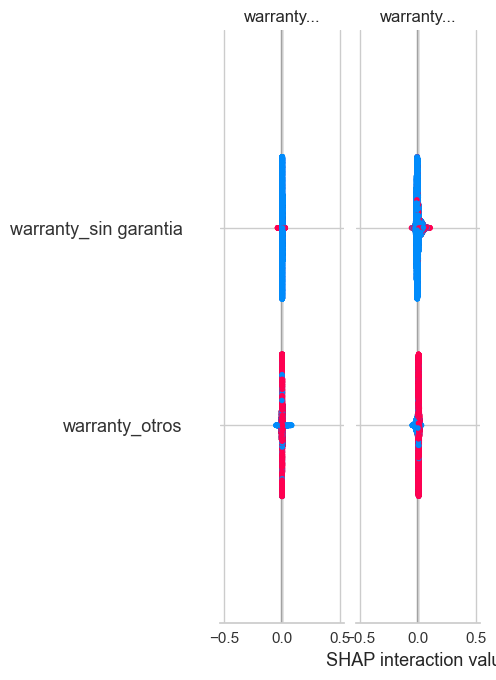

In [15]:
interpret_model(rf, plot='summary')

In [16]:
import mlflow
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
profile.to_file("problem_report.html")